In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#### Preparing the Dataset

In [34]:
df = pd.read_csv('data/laptops.csv')

In [3]:
len(df)

2160

In [36]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [37]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [38]:
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [7]:
input_df = ["ram", "storage", "screen", "final_price"]

#### Exploratory Data Analysis (EDA)


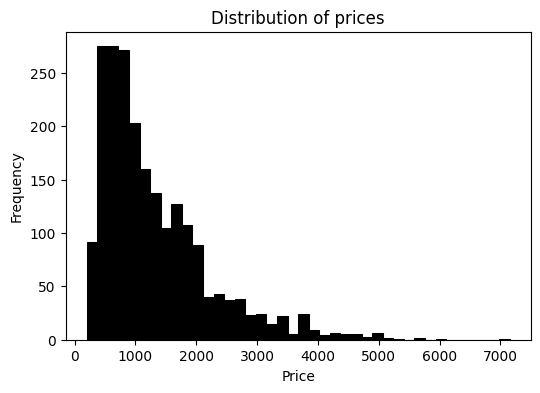

In [8]:
plt.figure(figsize=(6, 4))

sns.histplot(df.final_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [39]:
# Find laptops with price greater than 5000
expensive_laptops = df[df['final_price'] > 5000].sort_values(by='final_price', ascending=True)
expensive_laptops.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
1511,Lenovo Legion PRO 7 16IRX8H-566 Intel Core i9-...,New,Lenovo,Legion,Intel Core i9,32,1000,SSD,RTX 4080,16.0,No,5018.14
495,ASUS ROG Zephyrus Duo 16 2023 GX650PY-NM003W A...,New,Asus,ROG,AMD Ryzen 9,64,2000,SSD,RTX 4090,16.0,No,5159.00
952,MSI Raider GE78HX 13VI-063ES Intel Core i9-139...,New,MSI,Raider,Intel Core i9,64,2000,SSD,RTX 4090,17.0,No,5199.00
1475,HP ZBook Studio G8 Intel Core i7-11850H/16GB/5...,New,HP,Zbook,Intel Core i7,16,512,SSD,RTX A3000,15.6,No,5368.77
1245,ASUS ROG Strix Scar 17 G733PY-R97B49PB1 AMD R...,New,Asus,ROG,AMD Radeon 9,32,2000,SSD,RTX 4090,17.3,No,5630.90


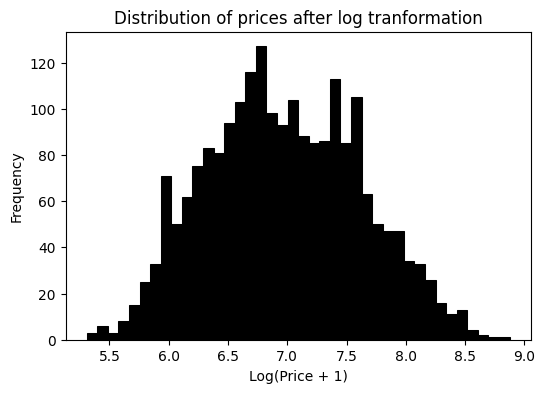

In [10]:
log_price = np.log1p(df.final_price)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [11]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   laptop        2160 non-null   object 
 1   status        2160 non-null   object 
 2   brand         2160 non-null   object 
 3   model         2160 non-null   object 
 4   cpu           2160 non-null   object 
 5   ram           2160 non-null   int64  
 6   storage       2160 non-null   int64  
 7   storage_type  2118 non-null   object 
 8   gpu           789 non-null    object 
 9   screen        2156 non-null   float64
 10  touch         2160 non-null   object 
 11  final_price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [89]:
## Question 1. Missing Values

for col in input_df:
    print(col)
    print(df[col].isna().sum())

ram
0
storage
0
screen
4
final_price
0


In [90]:
## Question 2. Median for Ram

df['ram'].median()

np.float64(16.0)

#### Validation Framework

In [42]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

print(n_train, n_val, n_test)

1296 432 432


In [43]:
np.random.seed(42)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [47]:
y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

#### Linear Regression

In [132]:
def linear_regression(X, y):
    # adding ones in the dataset X
    X_0 = np.ones(X.shape[0])
    X = np.column_stack([X_0, X])

    XTX = X.T.dot(X)
    XTX_inverse = np.linalg.inv(XTX)
    w = XTX_inverse.dot(X.T).dot(y)

    return w[0], w[1:]

In [133]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

#### Baseline Solution

In [134]:
base = ['ram', 'storage', 'screen']

In [135]:
# Question 3. Filling NAs

def handle_nan(df, y, fill_value):
    """
    This function trains a linear regression model after filling missing values in the 'screen' column.
    
    Parameters:
    - df: DataFrame containing the training data.
    - y: Array of target values.
    - fill_value: Value to fill the missing entries in the 'screen' column.

    Returns:
    - w0: Bias term of the model.
    - w: Coefficients of the model.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_filled = df.copy()
    
    # Fill missing values in the 'screen' column with the specified fill value
    df_filled['screen'] = df_filled['screen'].fillna(fill_value)

    # Train the linear regression model
    w0, w = linear_regression(df_filled[base], y)
    return w0, w

In [101]:
# Step 1: Calculate the mean to fill the missing values
mean_to_fill = df_train['screen'].mean()

# Step 2: Handle missing values with zeros and mean
w0_zero, w_zero = handle_nan(df_train, y_train, 0)  # Fill with 0
w0_mean, w_mean = handle_nan(df_train, y_train, mean_to_fill)  # Fill with mean

# Step 3: Predictions for zero-filled and mean-filled data
y_pred_zero = w0_zero + df_filled_zero[base].dot(w_zero)
y_pred_mean = w0_mean + df_filled_mean[base].dot(w_mean)

# Step 4: Calculate RMSE for both strategies
rmse_zero = rmse(y_train, y_pred_zero)
rmse_mean = rmse(y_train, y_pred_mean)

# Print results
print("RMSE with zeros:", round(rmse_zero, 2))
print("RMSE with mean:", round(rmse_mean, 2))

RMSE with zeros: 0.45
RMSE with mean: 0.45


In [136]:
#Question 4. Regularization

# Regularized linear regression function
def regularized_linear_regression(X, y, r):
    # Adding a bias term
    X_0 = np.ones(X.shape[0])
    X = np.column_stack([X_0, X])

    # Regularization term (Ridge Regression)
    identity_matrix = np.eye(X.shape[1])  # Create identity matrix for the regularization
    identity_matrix[0, 0] = 0  # Don't regularize the bias term

    # Normal equation for regularized linear regression
    XTX = X.T.dot(X) + r * identity_matrix
    XTX_inverse = np.linalg.inv(XTX)
    w = XTX_inverse.dot(X.T).dot(y)

    return w

In [137]:
# Step 1: Fill NAs with 0
df_train.fillna(0, inplace=True)
df_val.fillna(0, inplace=True)

# Step 2: Evaluate different values of r
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
best_r = None
best_rmse = float('inf')

for r in r_values:
    # Train the model using regularized linear regression
    w = regularized_linear_regression(df_train[base], y_train, r)

    # Make predictions on the validation set
    y_pred_val = w[0] + df_val[base].dot(w[1:])

    # Calculate RMSE for the validation set
    rmse_val = rmse(y_val, y_pred_val)

    # Round RMSE to 2 decimal places
    rmse_val_rounded = round(rmse_val, 2)
    print(f"RMSE for r = {r}: {rmse_val_rounded}")

    # Determine if this is the best RMSE
    if rmse_val_rounded < best_rmse:
        best_rmse = rmse_val_rounded
        best_r = r
    elif rmse_val_rounded == best_rmse and r < best_r:
        best_r = r

# Step 3: Print the best r
print(f"The best r value is: {best_r} with an RMSE of: {best_rmse}")


RMSE for r = 0: 0.41
RMSE for r = 0.01: 0.41
RMSE for r = 0.1: 0.41
RMSE for r = 1: 0.41
RMSE for r = 5: 0.41
RMSE for r = 10: 0.41
RMSE for r = 100: 0.41
The best r value is: 0 with an RMSE of: 0.41


In [ ]:
#Question 5. RMSE Spread

base = ['ram', 'screen', 'storage']
target = 'final_price'

In [127]:
# List of seeds to try
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# To store RMSE scores
rmse_scores = []

for seed in seeds:
    # Step 1: Split the data (60% train, 20% val, 20% test)
    n = len(df)
    n_train = int(0.6 * n)
    n_val = int(0.2 * n)
    n_test = n - (n_train + n_val)

    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()  # Create a copy
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()  # Create a copy
    df_test = df_shuffled.iloc[n_train+n_val:].copy()  # Create a copy

    # Step 2: Fill missing values with 0
    df_train.fillna(0, inplace=True)  # Safe since it's a copy
    df_val.fillna(0, inplace=True)  # Safe since it's a copy

    # Train model
    w = linear_regression(df_train[base], df_train[target])

    # Step 3: Make predictions on validation set
    y_pred_val = w[0] + df_val[base].dot(w[1:])

    # Step 4: Calculate RMSE
    score = rmse(df_val[target], y_pred_val)
    rmse_scores.append(score)

# Step 5: Calculate standard deviation of RMSE scores
std_rmse = np.std(rmse_scores)

# Round the result to 3 decimal digits
print("Standard deviation of RMSE scores:", round(std_rmse, 3))

Standard deviation of RMSE scores: 29.176


In [126]:
#Question 6. RMSE on Test

# Step 1: Split the data with seed 9 (60% train, 20% val, 20% test)
seed = 9
n = len(df)
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - (n_train + n_val)

np.random.seed(seed)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()  # Create a copy
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()  # Create a copy
df_test = df_shuffled.iloc[n_train+n_val:].copy()  # Create a copy

# Step 2: Combine train and validation datasets
df_train_val = pd.concat([df_train, df_val], ignore_index=True)

# Step 3: Fill missing values with 0
df_train_val.fillna(0, inplace=True)  # This is safe since df_train_val is a copy
df_test.fillna(0, inplace=True)  # This is safe since df_test is a copy

# Step 4: Train the model with r=0.001
r = 0.001
w = regularized_linear_regression(df_train_val[base], df_train_val[target], r)

# Step 5: Make predictions on the test dataset
y_pred_test = w[0] + df_test[base].dot(w[1:])

# Step 6: Calculate RMSE on the test dataset
rmse_test = rmse(df_test[target], y_pred_test)

# Print the RMSE on the test dataset
print("RMSE on the test dataset:", rmse_test)


RMSE on the test dataset: 608.610278435354
